# 從技術指標開始

#### 計算布林通道所需的參數

In [1]:
# 同樣讀取範例檔
import pandas
data = pandas.read_csv('listed_data.csv')
data = data[data['zdate']>'2018-12-31'].reset_index(drop=True)
data['coid'] = data['coid'].astype(str)
data.head(5)

,coid,開盤價(元),mdate,最高價(元),最低價(元),報酬率-Ln,成交量(千股),收盤價(元),外資總投資股數,zdate,常續性稅後淨利,單月營收(千元)
0,9958,63.6,2018-09-01,64.0,61.0,-6.1875,5732.0,61.1,3067.0,2019-01-02,-592.0,149382.0
1,9958,57.8,2018-09-01,59.9,56.8,-4.6910,8159.0,58.3,3051.0,2019-01-03,-592.0,149382.0
2,9958,57.3,2018-09-01,57.3,52.5,-10.4789,10576.0,52.5,2848.0,2019-01-04,-592.0,149382.0
3,9958,53.0,2018-09-01,54.7,52.0,0.5698,6607.0,52.8,3151.0,2019-01-07,-592.0,149382.0
4,9958,53.2,2018-09-01,53.5,52.3,-0.5698,2721.0,52.5,3040.0,2019-01-08,-592.0,149382.0


In [2]:
# 因為報酬率的單位是%，要先轉換一下
data['報酬率-Ln'] /= 100
data.head(5)

,coid,開盤價(元),mdate,最高價(元),最低價(元),報酬率-Ln,成交量(千股),收盤價(元),外資總投資股數,zdate,常續性稅後淨利,單月營收(千元)
0,9958,63.6,2018-09-01,64.0,61.0,-0.061875,5732.0,61.1,3067.0,2019-01-02,-592.0,149382.0
1,9958,57.8,2018-09-01,59.9,56.8,-0.046910,8159.0,58.3,3051.0,2019-01-03,-592.0,149382.0
2,9958,57.3,2018-09-01,57.3,52.5,-0.104789,10576.0,52.5,2848.0,2019-01-04,-592.0,149382.0
3,9958,53.0,2018-09-01,54.7,52.0,0.005698,6607.0,52.8,3151.0,2019-01-07,-592.0,149382.0
4,9958,53.2,2018-09-01,53.5,52.3,-0.005698,2721.0,52.5,3040.0,2019-01-08,-592.0,149382.0


### 計算布林通道的上中下軌所需參數
N = 20  
K = 2(2個標準差)  
中軌 = N時間段的簡單移動平均線  
上軌 = 中軌 + K × N時間段的標準差  
下軌 = 中軌 − K × N時間段的標準差  

In [3]:
k = 2
n = 20

### 首先計算20天均價，在上一章已經示範過用rolling可以輕鬆完成

In [4]:
# 因為裡面的資料是coid、zdate的排序，所以直接rolling就可以計算出正確的數字
data['收盤價(元)-20'] = data['收盤價(元)'].rolling(window=n).mean()
#注意看前幾列，數值特別小，但不會發生error
data[data['coid']=='2330']

,coid,開盤價(元),mdate,最高價(元),最低價(元),報酬率-Ln,成交量(千股),收盤價(元),外資總投資股數,zdate,常續性稅後淨利,單月營收(千元),收盤價(元)-20
183431,2330,226.5,2018-09-01,226.5,219.0,-0.026968,32900.0,219.5,20018233.0,2019-01-02,90012762.0,98389414.0,18.9435
183432,2330,214.0,2018-09-01,218.0,214.0,-0.018391,34615.0,215.5,19998889.0,2019-01-03,90012762.0,98389414.0,29.2795
183433,2330,214.0,2018-09-01,218.0,214.0,-0.018391,34615.0,215.5,19972833.0,2019-01-04,90012762.0,98389414.0,39.6250
183434,2330,212.0,2018-09-01,214.0,211.0,0.023754,35695.0,213.0,19976458.0,2019-01-07,90012762.0,98389414.0,49.8600
183435,2330,212.0,2018-09-01,212.5,210.0,-0.009434,23794.0,211.0,19977204.0,2019-01-08,90012762.0,98389414.0,60.0365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183731,2330,283.5,2019-12-01,284.0,280.5,0.026859,48887.0,283.0,19646818.0,2020-04-07,117107626.0,107884396.0,277.7000
183732,2330,285.0,2019-12-01,285.5,283.0,0.007042,38698.0,285.0,19657042.0,2020-04-08,117107626.0,107884396.0,276.6750
183733,2330,287.5,2019-12-01,288.0,282.5,-0.007042,29276.0,283.0,19662392.0,2020-04-09,117107626.0,107884396.0,275.4750
183734,2330,280.0,2019-12-01,282.0,279.0,-0.012445,28206.0,279.5,19658600.0,2020-04-10,117107626.0,107884396.0,274.1000


### 接著計算上下軌
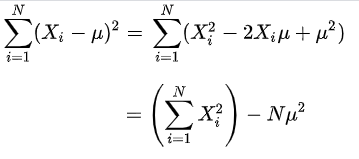  
根據數學定義，可以拆解成兩組計算

In [5]:
import numpy
data['報酬率-Ln-平方'] = data['報酬率-Ln']*data['報酬率-Ln']
data['報酬率-Ln-平方和'] = data['報酬率-Ln-平方'].rolling(window=n).sum()
data['報酬率-Ln-平均'] = data['報酬率-Ln'].rolling(window=n).mean()
data['報酬率-Ln-20天變異數']  = data['報酬率-Ln-平方和']/n - data['報酬率-Ln-平均']*data['報酬率-Ln-平均'] 
data['報酬率-Ln-20天標準差'] = numpy.sqrt(data['報酬率-Ln-20天變異數'])
data['布林通道-上軌'] = data['收盤價(元)-20']*numpy.exp(data['報酬率-Ln-20天標準差']*k)
data['布林通道-下軌'] = data['收盤價(元)-20']*numpy.exp(-1*data['報酬率-Ln-20天標準差']*k)

data.loc[data['coid']=='2499',['zdate','收盤價(元)','收盤價(元)-20','布林通道-上軌','布林通道-下軌']].tail(20)

C:\Users\zyx\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,zdate,收盤價(元),收盤價(元)-20,布林通道-上軌,布林通道-下軌
146201,2020-03-13,7.08,6.4660,6.915375,6.045826
146202,2020-03-16,6.80,6.4905,6.962293,6.050677
146203,2020-03-17,6.67,6.5100,6.987652,6.064999
146204,2020-03-18,6.23,6.5105,7.033152,6.026687
146205,2020-03-19,5.61,6.4800,7.088437,5.923788
146206,2020-03-20,5.84,6.4595,7.080765,5.892744
146207,2020-03-23,5.40,6.4195,7.076788,5.823261
146208,2020-03-24,5.60,6.3895,7.056419,5.785613
146209,2020-03-25,5.85,6.3745,7.055448,5.759273
146210,2020-03-26,5.98,6.3695,7.053125,5.752135


### 檢查看看布林通道的買點

In [6]:
data['布林通道-買進'] = 0
data.loc[data['布林通道-下軌'] > data['收盤價(元)'] ,'布林通道-買進'] = 1
data.loc[data['收盤價(元)'] ==0,'布林通道-買進'] = 0

### 同樣的式子反過來寫，就是賣點

In [7]:
data['布林通道-賣出'] = 0
data.loc[data['布林通道-上軌'] < data['收盤價(元)'] ,'布林通道-賣出'] = 1

### 試著以布林通道做一次回測

In [49]:
# 取得最近一年的交易日
all_zdate_list = data.loc[data['zdate']>'2019-04-13','zdate'].unique()
# 設定一個持股清單，方便比對
hold_df = None
hold_list_trend = []
#從最舊開始模擬
cash = 10000000
start_cash = cash
cash_trend = []
for this_date in all_zdate_list:
    #因出售產生的現金變化
    add_cash = 0
    #因持股產生的現值變化
    add_pv = 0
    this_data = data[data['zdate']==this_date]
    #取出買賣條件
    this_buy_list  = this_data.loc[data['布林通道-買進']==1,'coid'].values.tolist()    
    this_sell_list = this_data.loc[data['布林通道-賣出']==1,'coid'].values.tolist()
    if len(hold_list_trend)>0:
        hold_list = hold_list_trend[len(hold_list_trend)-1].copy()
    else:
        hold_list = {}
    if len(hold_list)>0:
        #先計算繼續持股的股票的損益
        current_price_hold = this_data.loc[this_data['coid'].isin(list(hold_list.keys())),['coid','報酬率-Ln']]        
        for coid_roi in current_price_hold.values:
            add_pv += coid_roi[1]*hold_list.get(coid_roi[0])  
        cash += add_pv
        
        #找出賣出清單與持股清單的交集
        left_coid = numpy.setdiff1d(list(hold_list.keys()),this_sell_list).tolist()
        #將賣剩的與今天有買進訊號的整理成持股清單
        current_hold_list = list(set(this_buy_list+left_coid))   
        
        #找出賣出清單與持股清單的補集，用來出售，看看有沒有餘絀現金
        sold_coid = numpy.intersect1d(list(hold_list.keys()),this_sell_list).tolist()
        current_price_sell = this_data.loc[this_data['coid'].isin(sold_coid),['coid','收盤價(元)']]
        
        for coid_prc in current_price_sell.values:
            add_cash += coid_prc[1]*hold_list.get(coid_prc[0])
        #將賣掉的代碼從持股清單中移除
        for coid in sold_coid:
            del hold_list[coid]
      
    else:
        current_hold_list = this_buy_list

    cash_trend.append([this_date,cash])
    if add_cash>0 or len(hold_list)==0:
        #只有當有出售股票產生現金，或是持股清單變動，才進行重分配

        unit_pv = cash/len(current_hold_list)
        current_price = this_data.loc[this_data['coid'].isin(current_hold_list),['coid','收盤價(元)']]
        #必須清除股價為零(下市)的公司
        current_price = current_price[current_price['收盤價(元)']>0]
        
        current_price = current_price[current_price['收盤價(元)']<unit_pv/1000]
        unit_pv = cash/len(current_hold_list)
        #計算持股股數邏輯
        a_hold_list = {coid_prc[0]:numpy.floor(unit_pv/(coid_prc[1]*1000))*1000 for coid_prc in current_price.values}
        hold_list = a_hold_list
    hold_list_trend.append(hold_list)


    this_hold_df = pandas.DataFrame([[this_date,a,hold_list.get(a)] for a in hold_list],columns=['zdate','coid','持股數'])
    
    if hold_df is None:
        hold_df = this_hold_df
    else:
        hold_df = hold_df.append(this_hold_df,sort=False)
hold_df = hold_df.fillna(0)
#產生損益的觀看frame    
roi_df = pandas.DataFrame(cash_trend,columns=['zdate','pv'])
roi_df

,zdate,pv
0,2019-04-15,1.000000e+07
1,2019-04-16,1.000480e+07
2,2019-04-17,1.000599e+07
3,2019-04-18,9.997862e+06
4,2019-04-19,9.995181e+06
...,...,...
238,2020-04-07,9.902788e+06
239,2020-04-08,9.930086e+06
240,2020-04-09,9.939617e+06
241,2020-04-10,9.956758e+06


In [50]:
hold_df.to_csv('hold_df.csv',index=False)
hold_df.head(5)

,zdate,coid,持股數
0,2019-04-15,9945,2000.0
1,2019-04-15,9935,4000.0
2,2019-04-15,9927,2000.0
3,2019-04-15,9907,7000.0
4,2019-04-15,8473,1000.0


### 比較損益狀況

In [37]:
# 首先看看投資組合
roi_df.head(5)

,zdate,pv
0,2019-04-15,1.000000e+07
1,2019-04-16,1.000480e+07
2,2019-04-17,1.000599e+07
3,2019-04-18,9.997862e+06
4,2019-04-19,9.995181e+06


In [13]:
# 查看大盤績效
benchmark_data = pandas.read_csv('benchmark_data.csv')
print(benchmark_data.head(65))
benchmarkstart_index = benchmark_data.loc[benchmark_data['zdate']>=all_zdate_list[0],'close_d'].values[0]
print(benchmarkstart_index)

     coid       zdate   close_d
0   Y9997  2019-01-02  17045.43
1   Y9997  2019-01-03  16935.32
2   Y9997  2019-01-04  16739.23
3   Y9997  2019-01-07  17109.94
4   Y9997  2019-01-08  17062.30
..    ...         ...       ...
60  Y9997  2019-04-11  19283.80
61  Y9997  2019-04-12  19277.60
62  Y9997  2019-04-15  19403.03
63  Y9997  2019-04-16  19496.24
64  Y9997  2019-04-17  19620.09

[65 rows x 3 columns]
19403.03


In [14]:
benchmark_data['績效指標現值'] = start_cash*benchmark_data['close_d']/benchmarkstart_index
roi_df = roi_df.merge(benchmark_data[['zdate','績效指標現值']],on=['zdate'],how='left')

In [15]:
roi_df.tail(5)

,zdate,pv,績效指標現值
238,2020-04-07,9902787.545,9.631784e+06
239,2020-04-08,9930085.535,9.767887e+06
240,2020-04-09,9939616.713,9.752379e+06
241,2020-04-10,9956758.207,9.789167e+06
242,2020-04-13,9956829.477,9.732897e+06


In [22]:
roi_df.to_csv('roi_df.csv',index=False)

### 查看月營收公佈日

In [16]:
data_sales = pandas.read_csv('data_sales.csv')
data_sales['coid'] = data_sales['coid'].astype(str)
data_sales['營收事件日'] = 1
data_sales[data_sales['coid']=='2330']
data = data.merge(data_sales,on=['coid','zdate'],how='left')
data['營收事件日'] = data['營收事件日'].fillna(0)

In [17]:
salse_window = 3
data['營收事件窗口'] = data['營收事件日'].rolling(window=salse_window).sum()

data[(data['coid']=='2330')&(data['營收事件窗口']==1)]

,coid,開盤價(元),mdate,最高價(元),最低價(元),報酬率-Ln,成交量(千股),收盤價(元),外資總投資股數,zdate,...,報酬率-Ln-平方和,報酬率-Ln-平均,報酬率-Ln-20天變異數,報酬率-Ln-20天標準差,布林通道-上軌,布林通道-下軌,布林通道-買進,布林通道-賣出,營收事件日,營收事件窗口
183437,2330,216.0,2018-09-01,216.5,214.5,0.002317,20832.0,216.0,19986194.0,2019-01-10,...,0.012326,0.007970,0.000553,0.023512,84.733725,77.128064,0,1,1.0,1.0
183438,2330,219.0,2018-09-01,220.5,218.0,0.020619,28658.0,220.5,19997797.0,2019-01-11,...,0.011608,0.007310,0.000527,0.022956,95.773183,87.370670,0,1,0.0,1.0
183439,2330,218.5,2018-09-01,220.0,217.0,-0.009112,17612.0,218.5,19995975.0,2019-01-14,...,0.009880,0.004726,0.000472,0.021717,106.520151,97.657297,0,1,0.0,1.0
183456,2330,229.0,2018-09-01,229.0,226.5,0.000000,22369.0,227.0,20046816.0,2019-02-15,...,0.004025,0.002599,0.000194,0.013946,229.255879,216.817569,0,0,1.0,1.0
183457,2330,229.0,2018-09-01,230.5,228.5,0.013129,18163.0,230.0,20052880.0,2019-02-18,...,0.004192,0.003140,0.000200,0.014132,230.061651,217.417037,0,0,0.0,1.0
183458,2330,230.0,2018-09-01,230.5,229.0,-0.004357,18423.0,229.0,20052312.0,2019-02-19,...,0.003786,0.001891,0.000186,0.013627,230.266046,218.050410,0,0,0.0,1.0
183469,2330,231.0,2018-12-01,231.5,229.0,-0.017242,22535.0,230.0,20097412.0,2019-03-08,...,0.003577,0.000218,0.000179,0.013372,237.980289,225.585447,0,0,1.0,1.0
183470,2330,228.0,2018-12-01,230.5,227.5,0.002172,34282.0,230.5,20089453.0,2019-03-11,...,0.002753,0.001766,0.000135,0.011598,237.546890,226.778006,0,0,0.0,1.0
183471,2330,233.0,2018-12-01,237.0,232.5,0.021460,23839.0,235.5,20095511.0,2019-03-12,...,0.003168,0.003178,0.000148,0.012177,238.564927,227.223177,0,0,0.0,1.0
183490,2330,253.0,2018-12-01,254.5,252.0,0.000000,33174.0,254.0,20203156.0,2019-04-10,...,0.003801,0.005610,0.000159,0.012593,249.992849,237.711802,0,1,1.0,1.0


In [18]:
import numpy as np
import pandas as pd
import talib
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib

In [19]:
all_ta_label = talib.get_functions()
all_ta_label

['HT_DCPERIOD',
 'HT_DCPHASE',
 'HT_PHASOR',
 'HT_SINE',
 'HT_TRENDMODE',
 'ADD',
 'DIV',
 'MAX',
 'MAXINDEX',
 'MIN',
 'MININDEX',
 'MINMAX',
 'MINMAXINDEX',
 'MULT',
 'SUB',
 'SUM',
 'ACOS',
 'ASIN',
 'ATAN',
 'CEIL',
 'COS',
 'COSH',
 'EXP',
 'FLOOR',
 'LN',
 'LOG10',
 'SIN',
 'SINH',
 'SQRT',
 'TAN',
 'TANH',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'BOP',
 'CCI',
 'CMO',
 'DX',
 'MACD',
 'MACDEXT',
 'MACDFIX',
 'MFI',
 'MINUS_DI',
 'MINUS_DM',
 'MOM',
 'PLUS_DI',
 'PLUS_DM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'RSI',
 'STOCH',
 'STOCHF',
 'STOCHRSI',
 'TRIX',
 'ULTOSC',
 'WILLR',
 'BBANDS',
 'DEMA',
 'EMA',
 'HT_TRENDLINE',
 'KAMA',
 'MA',
 'MAMA',
 'MAVP',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'T3',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',


In [20]:
import yfinance as yf
# 透過取得 AAPL 價量資料
df = yf.Ticker('AAPL').history(period = 'max')

In [ ]:
df

In [ ]:
# 觀看index類別，是dateindex
type(df.index)

In [ ]:
d2330 = data[(data['coid']=='2330')].rename(columns={'開盤價(元)':'open','最高價(元)':'high','最低價(元)':'low','收盤價(元)':'close','成交量(千股)':'volume'})
d2330['Date'] = pd.to_datetime(d2330['zdate'])
d2330 = d2330.set_index('Date')
type(d2330.index)

In [ ]:
d2330

In [ ]:
d2330['ADX'] = talib.ADX(d2330.high, d2330.low, d2330.close, timeperiod = 14)
d2330[['ADX']].tail(20)

### 使用abstract方式計算計數指標

In [ ]:
# 建議不要用from import，容易混淆變數空間
d2330['ADX'] = talib.ADX(d2330.high, d2330.low, d2330.close, timeperiod = 14)
talib.abstract.ADX(d2330, timperiod = 14)

In [ ]:
talib_list = talib.get_functions()
d2330['periods'] = 30.0
# 逐個
for ta_name in talib_list:
    output = eval('talib.abstract.'+ta_name+'(d2330)')
    # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
    if type(output) == pd.core.series.Series:
        d2330[ta_name] = output
    else:
        d2330 = d2330.merge(output,left_on = d2330.index,right_on=output.index)
        d2330 = d2330.set_index('key_0')
    # 透過 merge 把輸出結果併入 df DataFrame
    print(d2330.tail(3))


In [ ]:
d2330

### Ta-Lib的優點
1.優化的算法，計算飛快  
2.支援抽像化語法  
3.以dataframe正規化的資料格式，可以輕易轉換資料集

### Ta-Lib使用上的不足處
1.欠缺橫斷面的排序與計算  
2.計算速度雖然快，但是在回測過程卻會顯得重復且多餘，因為當每天更新資料時，talib函式仍會把各股歷史重算一次  
3.計算架構無法容納具持股數依存性的指標計算  
4.talib計算必須各股分開，若是每日正常運行，還要進行合併各股，反而麻煩